<a href="https://colab.research.google.com/github/dilaraesmer/EDA-Exploratory-Data-Analysis-/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis (Keşifsel Veri Analizi)

İstatistikte, keşifsel veri analizi, genellikle istatistiksel grafikler ve diğer veri görselleştirme yöntemlerini kullanarak temel özelliklerini özetlemek için veri kümelerini analiz etme yaklaşımıdır.

"2021-22 NBA oyuncularının oyun başına istatistikleri" veri setinden çekilmiştir.

 https://www.basketball-reference.com/leagues/NBA_2022_per_game.html

In [1]:
import pandas as pd
# HTML sayfasındaki verileri çekmek için aşağıdaki adımlar incelenir.
url = 'https://www.basketball-reference.com/leagues/NBA_2021_per_game.html'
html = pd.read_html(url, header = 0)
df2021 = html[0]

# Veri temizleme işlemi 
raw = df2021.drop(df2021[df2021.Age == 'Age'].index)
raw


Rk             Player Pos Age   Tm   G  ...  AST  STL  BLK  TOV   PF   PTS
0      1   Precious Achiuwa  PF  21  MIA  61  ...  0.5  0.3  0.5  0.7  1.5   5.0
1      2       Jaylen Adams  PG  24  MIL   7  ...  0.3  0.0  0.0  0.0  0.1   0.3
2      3       Steven Adams   C  27  NOP  58  ...  1.9  0.9  0.7  1.3  1.9   7.6
3      4        Bam Adebayo   C  23  MIA  64  ...  5.4  1.2  1.0  2.6  2.3  18.7
4      5  LaMarcus Aldridge   C  35  TOT  26  ...  1.9  0.4  1.1  1.0  1.8  13.5
..   ...                ...  ..  ..  ...  ..  ...  ...  ...  ...  ...  ...   ...
726  536       Delon Wright  PG  28  SAC  27  ...  3.6  1.6  0.4  1.3  1.1  10.0
727  537     Thaddeus Young  PF  32  CHI  68  ...  4.3  1.1  0.6  2.0  2.2  12.1
728  538         Trae Young  PG  22  ATL  63  ...  9.4  0.8  0.2  4.1  1.8  25.3
729  539        Cody Zeller   C  28  CHO  48  ...  1.8  0.6  0.4  1.1  2.5   9.4
730  540        Ivica Zubac   C  23  LAC  72  ...  1.3  0.3  0.9  1.1  2.6   9.0

[705 rows x 30 columns]

**Data Cleaning (Veri Temizleme)**

Data dimension (veri boyutu)

In [2]:
raw.shape
# verinin kaç satır kaç sütundan oluştuğunu görmemize yarar.

(705, 30)

Dataframe contents (Veri çervesinin içeriği)

In [3]:
raw.head()

Rk             Player Pos Age   Tm   G  ...  AST  STL  BLK  TOV   PF   PTS
0  1   Precious Achiuwa  PF  21  MIA  61  ...  0.5  0.3  0.5  0.7  1.5   5.0
1  2       Jaylen Adams  PG  24  MIL   7  ...  0.3  0.0  0.0  0.0  0.1   0.3
2  3       Steven Adams   C  27  NOP  58  ...  1.9  0.9  0.7  1.3  1.9   7.6
3  4        Bam Adebayo   C  23  MIA  64  ...  5.4  1.2  1.0  2.6  2.3  18.7
4  5  LaMarcus Aldridge   C  35  TOT  26  ...  1.9  0.4  1.1  1.0  1.8  13.5

[5 rows x 30 columns]

Kayıp verilerin kontrolü 


In [4]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       29
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

Kayıp verilerin 0 ile değiştirilmesi

In [5]:
df = raw.fillna(0)

In [6]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [7]:
df = df.drop(['Rk'], axis=1) 
# kayıp verileri temizledikten sonra "Rk = Rank" sıra numaraları da değiştirilir.
df

Player Pos Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0     Precious Achiuwa  PF  21  MIA  61   4  ...  0.5  0.3  0.5  0.7  1.5   5.0
1         Jaylen Adams  PG  24  MIL   7   0  ...  0.3  0.0  0.0  0.0  0.1   0.3
2         Steven Adams   C  27  NOP  58  58  ...  1.9  0.9  0.7  1.3  1.9   7.6
3          Bam Adebayo   C  23  MIA  64  64  ...  5.4  1.2  1.0  2.6  2.3  18.7
4    LaMarcus Aldridge   C  35  TOT  26  23  ...  1.9  0.4  1.1  1.0  1.8  13.5
..                 ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
726       Delon Wright  PG  28  SAC  27   8  ...  3.6  1.6  0.4  1.3  1.1  10.0
727     Thaddeus Young  PF  32  CHI  68  23  ...  4.3  1.1  0.6  2.0  2.2  12.1
728         Trae Young  PG  22  ATL  63  63  ...  9.4  0.8  0.2  4.1  1.8  25.3
729        Cody Zeller   C  28  CHO  48  21  ...  1.8  0.6  0.4  1.1  2.5   9.4
730        Ivica Zubac   C  23  LAC  72  33  ...  1.3  0.3  0.9  1.1  2.6   9.0

[705 rows x 29 columns]

CSV dosyanına yazma  işlemi 


In [8]:
df.to_csv('nba2021.csv', index=False)


In [9]:
! ls # dosyayı listelemeyi sağlar. 

nba2021.csv  sample_data


In [10]:
! cat nba2021.csv # dosyanın içeriğini görüntülemeyi sağlar. 

Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,0.0,0.0,.000,2.0,3.7,.546,.544,0.9,1.8,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,0.0,0.3,.000,0.1,0.9,.167,.125,0.0,0.0,0,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,0.0,0.1,.000,3.3,5.3,.620,.614,1.0,2.3,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,0.0,0.1,.250,7.1,12.4,.573,.571,4.4,5.5,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,1.2,3.1,.388,4.2,8.3,.505,.525,1.6,1.8,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,.464,1.3,3.6,.360,4.2,8.2,.509,.518,1.5,1.8,.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
LaMarcus Aldridge,C,35,BRK,5,5,26.0,5.0,9.6,.521,0.8,1.0,.800,4.2,8.6,.488,.563,2.0,2.0,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1

**Keşifsel Veri Analizi**


Veri Okuma 

In [11]:
df = pd.read_csv('nba2021.csv') # csv dosyasını okumayı sağlar. 
df

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0     Precious Achiuwa  PF   21  MIA  61   4  ...  0.5  0.3  0.5  0.7  1.5   5.0
1         Jaylen Adams  PG   24  MIL   7   0  ...  0.3  0.0  0.0  0.0  0.1   0.3
2         Steven Adams   C   27  NOP  58  58  ...  1.9  0.9  0.7  1.3  1.9   7.6
3          Bam Adebayo   C   23  MIA  64  64  ...  5.4  1.2  1.0  2.6  2.3  18.7
4    LaMarcus Aldridge   C   35  TOT  26  23  ...  1.9  0.4  1.1  1.0  1.8  13.5
..                 ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
700       Delon Wright  PG   28  SAC  27   8  ...  3.6  1.6  0.4  1.3  1.1  10.0
701     Thaddeus Young  PF   32  CHI  68  23  ...  4.3  1.1  0.6  2.0  2.2  12.1
702         Trae Young  PG   22  ATL  63  63  ...  9.4  0.8  0.2  4.1  1.8  25.3
703        Cody Zeller   C   28  CHO  48  21  ...  1.8  0.6  0.4  1.1  2.5   9.4
704        Ivica Zubac   C   23  LAC  72  33  ...  1.3  0.3  0.9  1.1  2.6   9.0

[705 rows x 29 columns]

Eğer tüm gözlem birimlerini bir arada görüntülemek istiyorsak;

In [12]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

Player    Pos  Age   Tm   G  ...  STL  BLK  TOV   PF   PTS
0            Precious Achiuwa     PF   21  MIA  61  ...  0.3  0.5  0.7  1.5   5.0
1                Jaylen Adams     PG   24  MIL   7  ...  0.0  0.0  0.0  0.1   0.3
2                Steven Adams      C   27  NOP  58  ...  0.9  0.7  1.3  1.9   7.6
3                 Bam Adebayo      C   23  MIA  64  ...  1.2  1.0  2.6  2.3  18.7
4           LaMarcus Aldridge      C   35  TOT  26  ...  0.4  1.1  1.0  1.8  13.5
5           LaMarcus Aldridge      C   35  SAS  21  ...  0.4  0.9  1.0  1.7  13.7
6           LaMarcus Aldridge      C   35  BRK   5  ...  0.6  2.2  1.4  2.2  12.8
7           Ty-Shon Alexander     SG   22  PHO  15  ...  0.0  0.1  0.2  0.1   0.6
8    Nickeil Alexander-Walker     SG   22  NOP  46  ...  1.0  0.5  1.5  1.9  11.0
9               Grayson Allen     SG   25  MEM  50  ...  0.9  0.2  1.0  1.4  10.6
10              Jarrett Allen      C   22  TOT  63  ...  0.5  1.4  1.6  1.5  12.8
11              Jarrett Allen      C   22  BRK  12  ...  0.6  1.6  1.8  1.8  11.2
12              Jarrett Allen      C   22  CLE  51  ...  0.5  1.4  1.5  1.5  13.2
13            Al-Farouq Aminu     PF   30  TOT  23  ...  0.8  0.4  1.2  1.3   4.4
14            Al-Farouq Aminu     PF   30  ORL  17  ...  1.0  0.5  1.5  1.3   5.5
15            Al-Farouq Aminu     PF   30  CHI   6  ...  0.3  0.0  0.5  1.2   1.5
16              Kyle Anderson     PF   27  MEM  69  ...  1.2  0.8  1.2  1.7  12.4
17      Giannis Antetokounmpo     PF   26  MIL  61  ...  1.2  1.2  3.4  2.8  28.1
18       Kostas Antetokounmpo     PF   23  LAL  15  ...  0.1  0.3  0.7  0.5   0.8
19     Thanasis Antetokounmpo     SF   28  MIL  57  ...  0.4  0.2  0.8  1.3   2.9
20            Carmelo Anthony     PF   36  POR  69  ...  0.7  0.6  0.9  2.1  13.4
21               Cole Anthony     PG   20  ORL  47  ...  0.6  0.4  2.3  2.1  12.9
22                 OG Anunoby     SF   23  TOR  43  ...  1.5  0.7  1.7  2.7  15.9
23           Ryan Arcidiacono     PG   26  CHI  44  ...  0.2  0.0  0.2  1.1   3.1
24               Trevor Ariza     SF   35  MIA  30  ...  1.0  0.6  0.7  1.8   9.4
25              D.J. Augustin     PG   33  TOT  57  ...  0.5  0.0  1.1  1.0   7.7
26              D.J. Augustin     PG   33  MIL  37  ...  0.5  0.0  0.9  0.9   6.1
27              D.J. Augustin     PG   33  HOU  20  ...  0.4  0.0  1.6  1.2  10.6
28                Deni Avdija     SF   20  WAS  54  ...  0.6  0.3  0.6  2.6   6.3
29              Deandre Ayton      C   22  PHO  69  ...  0.6  1.2  1.5  2.8  14.4
30             Udoka Azubuike      C   21  UTA  15  ...  0.1  0.3  0.2  0.6   1.1
31               Dwayne Bacon     SG   25  ORL  72  ...  0.6  0.1  0.6  1.4  10.9
32          Marvin Bagley III     PF   21  SAC  43  ...  0.5  0.5  1.4  2.3  14.1
33                LaMelo Ball     PG   19  CHO  51  ...  1.6  0.4  2.8  2.7  15.7
34                 Lonzo Ball     PG   23  NOP  55  ...  1.5  0.6  2.2  1.9  14.6
35                   Mo Bamba      C   22  ORL  46  ...  0.3  1.3  0.8  1.9   8.0
36               Desmond Bane     SG   22  MEM  68  ...  0.6  0.2  0.9  1.8   9.2
37            Harrison Barnes     PF   28  SAC  58  ...  0.7  0.2  1.6  1.3  16.1
38                 RJ Barrett     SG   20  NYK  72  ...  0.7  0.3  1.9  2.6  17.6
39                Will Barton     SF   30  DEN  56  ...  0.9  0.4  1.7  1.7  12.7
40           Keita Bates-Diop     SF   25  SAS  30  ...  0.4  0.2  0.2  0.4   2.6
41              Nicolas Batum     SF   32  LAC  67  ...  1.0  0.6  0.8  1.5   8.1
42                Aron Baynes      C   34  TOR  53  ...  0.3  0.4  0.9  2.2   6.1
43              Kent Bazemore     SF   31  GSW  67  ...  1.0  0.5  1.2  2.4   7.2
44              Darius Bazley     PF   20  OKC  55  ...  0.5  0.5  2.2  1.1  13.7
45               Bradley Beal     SG   27  WAS  60  ...  1.2  0.4  3.1  2.3  31.3
46              Malik Beasley     SG   24  MIN  37  ...  0.8  0.2  1.6  1.7  19.6
47                Jordan Bell      C   26  TOT   6  ...  0.5  0.8  0.7  1.2   2.5
48   

Verilerin bu şekilde dataframe'de saklanması işlemleri gerçekleştirmede güçlük yaratacaktır bu nedenle varsasyılan moda geri döndürmemiz gerekir. 

In [13]:
pd.set_option('display.max_rows', 10)
df

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0     Precious Achiuwa  PF   21  MIA  61   4  ...  0.5  0.3  0.5  0.7  1.5   5.0
1         Jaylen Adams  PG   24  MIL   7   0  ...  0.3  0.0  0.0  0.0  0.1   0.3
2         Steven Adams   C   27  NOP  58  58  ...  1.9  0.9  0.7  1.3  1.9   7.6
3          Bam Adebayo   C   23  MIA  64  64  ...  5.4  1.2  1.0  2.6  2.3  18.7
4    LaMarcus Aldridge   C   35  TOT  26  23  ...  1.9  0.4  1.1  1.0  1.8  13.5
..                 ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
700       Delon Wright  PG   28  SAC  27   8  ...  3.6  1.6  0.4  1.3  1.1  10.0
701     Thaddeus Young  PF   32  CHI  68  23  ...  4.3  1.1  0.6  2.0  2.2  12.1
702         Trae Young  PG   22  ATL  63  63  ...  9.4  0.8  0.2  4.1  1.8  25.3
703        Cody Zeller   C   28  CHO  48  21  ...  1.8  0.6  0.4  1.1  2.5   9.4
704        Ivica Zubac   C   23  LAC  72  33  ...  1.3  0.3  0.9  1.1  2.6   9.0

[705 rows x 29 columns]

Veri çervesinin her bir sütununun veri tipleri hakkında genel bilgi sahibi olmak için aşağıdaki komut kullanılır. 

In [14]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
           ...   
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Length: 29, dtype: object

Veri çerçevesinde belirtilmiş olan veri tipini görüntülemeyi sağlar. 

In [15]:
df.select_dtypes(include=['number']) # veri tipi sayısal olan verilerin görülmesi

Age   G  GS    MP   FG   FGA    FG%  ...  TRB  AST  STL  BLK  TOV   PF   PTS
0     21  61   4  12.1  2.0   3.7  0.544  ...  3.4  0.5  0.3  0.5  0.7  1.5   5.0
1     24   7   0   2.6  0.1   1.1  0.125  ...  0.4  0.3  0.0  0.0  0.0  0.1   0.3
2     27  58  58  27.7  3.3   5.3  0.614  ...  8.9  1.9  0.9  0.7  1.3  1.9   7.6
3     23  64  64  33.5  7.1  12.5  0.570  ...  9.0  5.4  1.2  1.0  2.6  2.3  18.7
4     35  26  23  25.9  5.4  11.4  0.473  ...  4.5  1.9  0.4  1.1  1.0  1.8  13.5
..   ...  ..  ..   ...  ...   ...    ...  ...  ...  ...  ...  ...  ...  ...   ...
700   28  27   8  25.8  3.9   8.3  0.462  ...  3.9  3.6  1.6  0.4  1.3  1.1  10.0
701   32  68  23  24.3  5.4   9.7  0.559  ...  6.2  4.3  1.1  0.6  2.0  2.2  12.1
702   22  63  63  33.7  7.7  17.7  0.438  ...  3.9  9.4  0.8  0.2  4.1  1.8  25.3
703   28  48  21  20.9  3.8   6.8  0.559  ...  6.8  1.8  0.6  0.4  1.1  2.5   9.4
704   23  72  33  22.3  3.6   5.5  0.652  ...  7.2  1.3  0.3  0.9  1.1  2.6   9.0

[705 rows x 26 columns]

In [16]:
df.select_dtypes(include=['object']) # nitel verilerin görüntülenmesini sağlar. 
# Bu veri seti için oyuncuların isimleri, pozisyonları ve takım isimleridir. 

Player Pos   Tm
0     Precious Achiuwa  PF  MIA
1         Jaylen Adams  PG  MIL
2         Steven Adams   C  NOP
3          Bam Adebayo   C  MIA
4    LaMarcus Aldridge   C  TOT
..                 ...  ..  ...
700       Delon Wright  PG  SAC
701     Thaddeus Young  PF  CHI
702         Trae Young  PG  ATL
703        Cody Zeller   C  CHO
704        Ivica Zubac   C  LAC

[705 rows x 3 columns]

## Sorular

**Koşullu Seçim**

Keşifsel veri analizini uygularken, analiz veya karşılaştırma yapmak için veri alt kümelerini seçebilmek önemlidir.

**Maç başına en çok puanı hangi oyuncu almıştır?**

In [17]:
df[df.PTS == df.PTS.max()] # PTS (Points Per Game) olarak kullanılmıştır.

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
151  Stephen Curry  PG   32  GSW  63  63  ...  5.8  1.2  0.1  3.4  1.9  32.0

[1 rows x 29 columns]

In [18]:
df.PTS # Tüm oyuncuların maç başına puanlarını listelenmiştir. 
df['PTS'] # yukarıdaki komutun bir diğer şekliyle ifade edilmiş halidir. 

0       5.0
1       0.3
2       7.6
3      18.7
4      13.5
       ... 
700    10.0
701    12.1
702    25.3
703     9.4
704     9.0
Name: PTS, Length: 705, dtype: float64

In [19]:
df.PTS.max() # .max() ile verilerden en büyüğünü görüntüler.
df['PTS'].max() # yukarıdaki komutla aynı anlama gelir. 

32.0

Maç başına en yüksek puanı alan oyuncu hangi takımdandır?

In [20]:
PlayerMaxPoints = df[df.PTS == df.PTS.max()]
PlayerMaxPoints.Tm # Tm (Team) ile gösterilen takım anlamında kullanıldı.

151    GSW
Name: Tm, dtype: object

Maç başına en yüksek puanı alan oyuncu hangi mevkide oynuyor?

In [21]:
PlayerMaxPoints.Pos # Pos (Position) pozisyonun kısaltımış halidir. 

151    PG
Name: Pos, dtype: object

Maç başına en yüksek puanı alan oyuncu sezonda kaç maçta oynamıştır?

In [22]:
PlayerMaxPoints.G # Game (Maç ya da oyun) için G kısaltması kullanılmıştır. 

151    63
Name: G, dtype: int64

**Hangi oyuncular maç başına 20 puandan daha fazla puana sahiptir?**

In [23]:
df[df.PTS > 20] 

Player Pos  Age   Tm   G  ...  STL  BLK  TOV   PF   PTS
17   Giannis Antetokounmpo  PF   26  MIL  61  ...  1.2  1.2  3.4  2.8  28.1
45            Bradley Beal  SG   27  WAS  60  ...  1.2  0.4  3.1  2.3  31.3
71            Devin Booker  SG   24  PHO  67  ...  0.8  0.2  3.1  2.7  25.6
89         Malcolm Brogdon  PG   28  IND  56  ...  0.9  0.3  2.1  2.0  21.2
94            Jaylen Brown  SG   24  BOS  58  ...  1.2  0.6  2.7  2.9  24.7
..                     ...  ..  ...  ...  ..  ...  ...  ...  ...  ...   ...
665              John Wall  PG   30  HOU  40  ...  1.1  0.8  3.5  1.2  20.6
675      Russell Westbrook  PG   32  WAS  65  ...  1.4  0.4  4.8  2.9  22.2
688        Zion Williamson  PF   20  NOP  61  ...  0.9  0.6  2.7  2.2  27.0
696         Christian Wood   C   25  HOU  41  ...  0.8  1.2  2.0  2.1  21.0
702             Trae Young  PG   22  ATL  63  ...  0.8  0.2  4.1  1.8  25.3

[49 rows x 29 columns]

**Hangi oyuncu maç başına en yüksek 3 sayılık saha atışına (3P) sahiptir?**

In [24]:
df[df['3P'] == df['3P'].max()]

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
151  Stephen Curry  PG   32  GSW  63  63  ...  5.8  1.2  0.1  3.4  1.9  32.0

[1 rows x 29 columns]

**Maç başına en yüksek asist (AST) hangi oyuncuya aittir?**

Basketbolda, bir takım arkadaşına topu pas veren bir oyuncuya bir asist atfedilir, bu da baskette "asist" yaptıkları anlamına gelir.

In [25]:
df[df['AST'] == df['AST'].max()]

Player Pos  Age   Tm   G  GS  ...   AST  STL  BLK  TOV   PF   PTS
675  Russell Westbrook  PG   32  WAS  65  65  ...  11.7  1.4  0.4  4.8  2.9  22.2

[1 rows x 29 columns]

**Yaşı en küçük olan oyuncunun maç başına aldığı puan en düşük kaçtır?**

(Birden fazla 19 yaşında olan kişi vardır.)

In [26]:
YasıEnKucukOyuncu = df[df.Age == df.Age.min()]
YasıEnKucukOyuncu.PTS.min()
# yaşı en küçük oyuncunun maç başına aldığı en düşük puan.
# 19 yaşında olan 15 kişi vardır. (15 rows x 29 columns) bilgisinden elde edilir.

2.4

In [27]:
df[df['Age'] == df['Age'].min()] # yukarıdaki komutla aynı amaca çalışır.

Player    Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
33          LaMelo Ball     PG   19  CHO  51  31  ...  6.1  1.6  0.4  2.8  2.7  15.7
114    Vernon Carey Jr.      C   19  CHO  19   4  ...  0.1  0.1  0.3  0.3  0.7   2.4
184     Anthony Edwards     SG   19  MIN  72  55  ...  2.9  1.1  0.5  2.2  1.8  19.3
254        R.J. Hampton  SG-PG   19  TOT  51   1  ...  1.7  0.4  0.2  1.0  1.2   6.9
255        R.J. Hampton     PG   19  DEN  25   0  ...  0.6  0.2  0.1  0.4  0.9   2.6
..                  ...    ...  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
523  Aleksej Pokusevski     PF   19  OKC  45  28  ...  2.2  0.4  0.9  2.2  1.3   8.2
542     Jahmi'us Ramsey     SG   19  SAC  13   0  ...  0.5  0.3  0.1  0.2  0.6   3.1
606      Isaiah Stewart      C   19  DET  68  14  ...  0.9  0.6  1.3  1.0  2.7   7.9
686    Patrick Williams     PF   19  CHI  71  71  ...  1.4  0.9  0.6  1.4  1.8   9.2
695       James Wiseman      C   19  GSW  39  27  ...  0.7  0.3  0.9  1.5  3.1  11.5

[15 rows x 29 columns]

**GroupBy() fonkisyonu**

**Los Angeles Lakers'ta oynayan hangi oyuncu en yüksek puana (PTS = maç başına puan) sahiptir?**

In [28]:
LAL = df.groupby('Tm').get_group('LAL')
# LAL adında bir değişken oluşturulur grupby fonkisyonundan yararlanılır. 

In [29]:
LAL[LAL.PTS == LAL.PTS.max()] 
# LAL olarak kısaltılan takımından maç başına en yüksek puana sahip oyuncu seçilir. 

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
329  LeBron James  PG   36  LAL  45  45  ...  7.8  1.1  0.6  3.7  1.6  25.0

[1 rows x 29 columns]

**5 pozisyondan hangisi en çok puanı almıştır?**

Öncelikle oyuncuları pozisyonlarına göre gruplandırırız. 

In [30]:
df.groupby('Pos').PTS.describe()

count       mean       std   min     25%    50%     75%   max
Pos                                                                 
C      138.0   8.451449  5.648205   0.0   4.775   7.55  11.200  28.5
C-PF     2.0   8.450000  7.141778   3.4   5.925   8.45  10.975  13.5
PF     143.0   7.484615  5.924184   0.0   3.150   6.00  10.050  28.1
PF-C     1.0   7.000000       NaN   7.0   7.000   7.00   7.000   7.0
PF-SF    2.0   4.150000  1.484924   3.1   3.625   4.15   4.675   5.2
...      ...        ...       ...   ...     ...    ...     ...   ...
SF-PF    3.0   5.366667  4.119871   1.5   3.200   4.90   7.300   9.7
SF-SG    3.0   9.733333  6.833984   3.6   6.050   8.50  12.800  17.1
SG     162.0   9.485185  6.427515   0.1   4.400   8.25  12.425  31.3
SG-PG    2.0   8.550000  2.333452   6.9   7.725   8.55   9.375  10.2
SG-SF    2.0  15.100000  4.949747  11.6  13.350  15.10  16.850  18.6

[13 rows x 8 columns]

Şimdi sadece 5 geleneksel pozisyon görüntülenir. (birleşik pozisyonları içeren satırlar analizden çıkarılacaktır).

Pandas isin() yöntemi, veri çerçevelerini filtrelemek için kullanılır. isin() yöntemi, belirli bir sütunda belirli bir (veya çoklu) değere sahip satırların seçilmesine olanak tanır.

In [31]:
positions = ['C', 'PF', 'SF', 'PG', 'SG']
POS = df[df['Pos'].isin(positions)]
POS

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0     Precious Achiuwa  PF   21  MIA  61   4  ...  0.5  0.3  0.5  0.7  1.5   5.0
1         Jaylen Adams  PG   24  MIL   7   0  ...  0.3  0.0  0.0  0.0  0.1   0.3
2         Steven Adams   C   27  NOP  58  58  ...  1.9  0.9  0.7  1.3  1.9   7.6
3          Bam Adebayo   C   23  MIA  64  64  ...  5.4  1.2  1.0  2.6  2.3  18.7
4    LaMarcus Aldridge   C   35  TOT  26  23  ...  1.9  0.4  1.1  1.0  1.8  13.5
..                 ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
700       Delon Wright  PG   28  SAC  27   8  ...  3.6  1.6  0.4  1.3  1.1  10.0
701     Thaddeus Young  PF   32  CHI  68  23  ...  4.3  1.1  0.6  2.0  2.2  12.1
702         Trae Young  PG   22  ATL  63  63  ...  9.4  0.8  0.2  4.1  1.8  25.3
703        Cody Zeller   C   28  CHO  48  21  ...  1.8  0.6  0.4  1.1  2.5   9.4
704        Ivica Zubac   C   23  LAC  72  33  ...  1.3  0.3  0.9  1.1  2.6   9.0

[689 rows x 29 columns]

Şimdi tanımlayıcı istatistiklere genel olarak bakılacaktır. 

In [32]:
POS.groupby('Pos').PTS.describe()

count      mean       std  min    25%   50%     75%   max
Pos                                                           
C    138.0  8.451449  5.648205  0.0  4.775  7.55  11.200  28.5
PF   143.0  7.484615  5.924184  0.0  3.150  6.00  10.050  28.1
PG   127.0  9.625984  7.062737  0.0  4.450  7.50  13.250  32.0
SF   119.0  7.811765  6.013081  0.0  3.900  6.10  10.900  26.4
SG   162.0  9.485185  6.427515  0.1  4.400  8.25  12.425  31.3

**Histogram**

Histogram, bir dizi sürekli verinin altında yatan frekans dağılımını (şeklini) keşfetmenizi ve göstermenizi sağlayan bir grafiktir. Bu, verilerin temel dağılımı (örn. normal dağılım), aykırı değerler, çarpıklık vb. için incelenmesine olanak tanır.

In [33]:
PTS = df[['Pos','PTS']]

positions = ['C', 'PF', 'SF', 'PG', 'SG']
PTS = PTS[ PTS['Pos'].isin(positions)]

PTS

Pos   PTS
0    PF   5.0
1    PG   0.3
2     C   7.6
3     C  18.7
4     C  13.5
..   ..   ...
700  PG  10.0
701  PF  12.1
702  PG  25.3
703   C   9.4
704   C   9.0

[689 rows x 2 columns]

**Pandas ile Görselleştirme**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aada2eb90>,
      dtype=object)

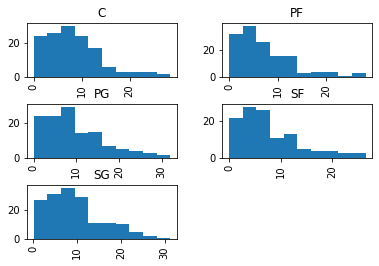

In [34]:
PTS['PTS'].hist(by=PTS['Pos'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aad8deb50>,
      dtype=object)

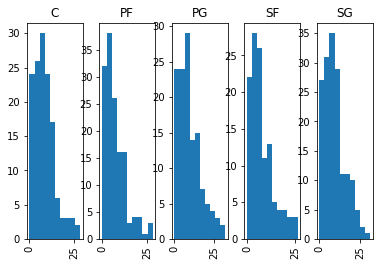

In [35]:
PTS['PTS'].hist(by = PTS['Pos'], layout = (1,5)) 
## layout yöntemi histogramın belirlenen satır ve sütun için yerini belirliyor. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aad932950>,
      dtype=object)

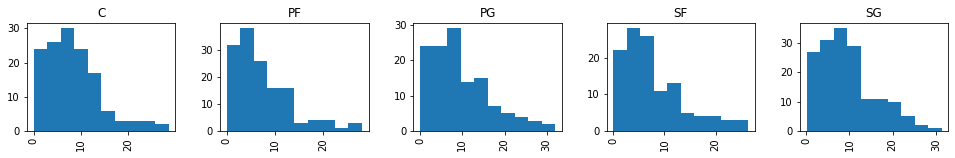

In [36]:
PTS['PTS'].hist(by = PTS['Pos'], layout = (1,5), figsize = (16,2))
## figsize ile görselin satır ve sütun genişliği açısından büyüklüğü belirlenir.

**Seaborn ile Veri Görselleştirme**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


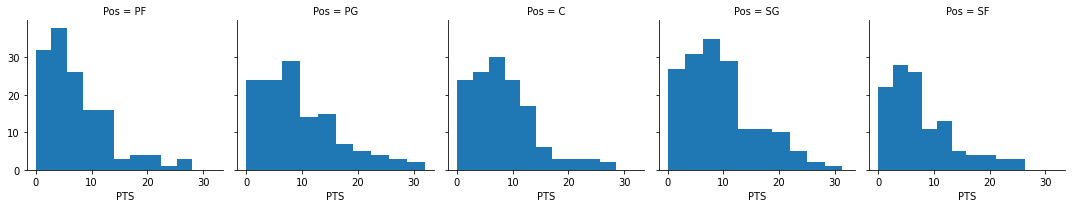

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas.util.testing as tm
g = sns.FacetGrid(PTS, col ="Pos")
g.map(plt.hist, "PTS");

**Kutu Grafiği (Box Plots)**

Tanımlayıcı istatistiklerde, bir kutu grafiği, açıklayıcı veri analizinde sıklıkla kullanılan bir grafik türüdür. Kutu grafikleri, çeyrekleri(yüzdelikleri) ve ortalamaları görüntüleyerek sayısal verilerin ve çarpıklığın dağılımını görsel olarak gösterir.

Pozisyona göre gruplandırılmış puanların (PTS) kutu grafiği

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


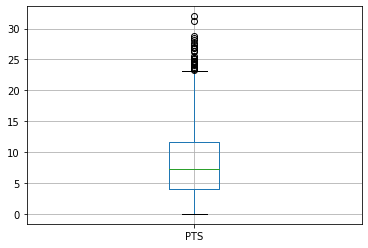

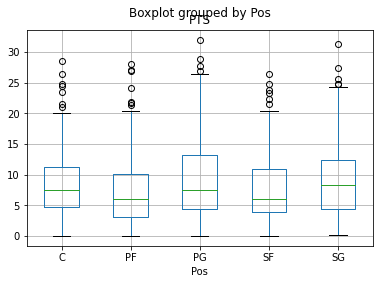

In [38]:
PTS.boxplot(column='PTS') # birleştirilmiş kutu grafiğini gösterir.
PTS.boxplot(column='PTS', by = 'Pos') # ayrı ayrı kutu grafiğini görüntüler.

**Seaborn data visualization**

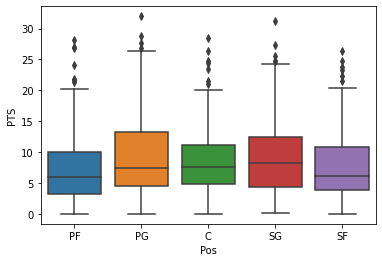

In [39]:
import seaborn as sns

sns.boxplot(x = 'Pos', y = 'PTS', data = PTS)

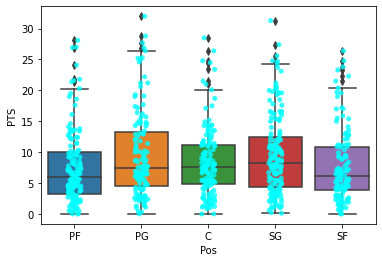

In [40]:
sns.boxplot(x ='Pos', y = 'PTS', data = PTS)
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True,
              marker='o',
              alpha=0.8,
              color="aqua")

**Heat Map (Isı Haritası)**

Korelasyon matrisi hesaplanır. 

Korelasyon, olasılık kuramı ve istatistikte iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir. Genel istatistiksel kullanımda korelasyon, bağımsızlık durumundan ne kadar uzaklaşıldığını gösterir. Farklı durumlar için farklı korelasyon katsayıları geliştirilmiştir. -1 ile +1 arasında değer alır.

In [41]:
corr = df.corr()
corr

Age         G        GS  ...       TOV        PF       PTS
Age  1.000000  0.061119  0.092335  ...  0.121069  0.111609  0.138877
G    0.061119  1.000000  0.644453  ...  0.325467  0.392205  0.465707
GS   0.092335  0.644453  1.000000  ...  0.591306  0.536160  0.713721
MP   0.198153  0.553135  0.764826  ...  0.736907  0.705754  0.879928
FG   0.127956  0.472687  0.716464  ...  0.794838  0.595233  0.990473
..        ...       ...       ...  ...       ...       ...       ...
STL  0.178456  0.409568  0.553341  ...  0.603082  0.531279  0.649888
BLK  0.042726  0.181272  0.322566  ...  0.264079  0.538745  0.303450
TOV  0.121069  0.325467  0.591306  ...  1.000000  0.564525  0.806638
PF   0.111609  0.392205  0.536160  ...  0.564525  1.000000  0.576618
PTS  0.138877  0.465707  0.713721  ...  0.806638  0.576618  1.000000

[26 rows x 26 columns]

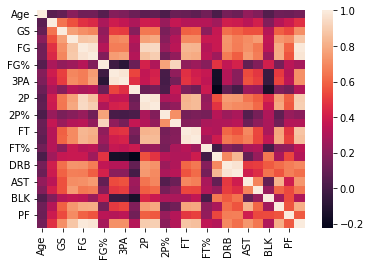

In [42]:
sns.heatmap(corr)

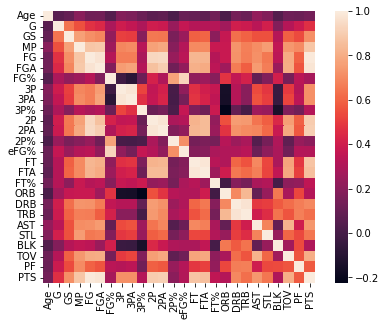

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (7,5))
sns.heatmap(corr, square = True)

Isı Haritasının yarısını çapraz olarak gizleyebiliriz. Buna da çapraz korelasyon matrisi denir. (Diagonal Correlation Matrix) 


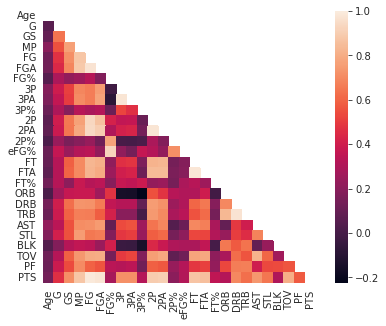

In [44]:
import numpy as np
import seaborn as sns 

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask) ] = True
with sns.axes_style("white"): # maskelenen kısımı beyaza boyandı.
  f, ax = plt.subplots(figsize=(7, 5))
  ax = sns.heatmap(corr, mask = mask, vmax=1, square = True)

**Scatter Plot (Saçılım Grafiği)**

Dağılım grafiklerinin birincil kullanımları, iki sayısal değişken arasındaki ilişkileri gözlemlemek ve göstermektir. Bir dağılım grafiğindeki noktalar, yalnızca tek tek veri noktalarının değerlerini bildirmekle kalmaz, aynı zamanda veriler bir bütün olarak alındığında kalıpları da bildirir.

In [45]:
df

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0     Precious Achiuwa  PF   21  MIA  61   4  ...  0.5  0.3  0.5  0.7  1.5   5.0
1         Jaylen Adams  PG   24  MIL   7   0  ...  0.3  0.0  0.0  0.0  0.1   0.3
2         Steven Adams   C   27  NOP  58  58  ...  1.9  0.9  0.7  1.3  1.9   7.6
3          Bam Adebayo   C   23  MIA  64  64  ...  5.4  1.2  1.0  2.6  2.3  18.7
4    LaMarcus Aldridge   C   35  TOT  26  23  ...  1.9  0.4  1.1  1.0  1.8  13.5
..                 ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
700       Delon Wright  PG   28  SAC  27   8  ...  3.6  1.6  0.4  1.3  1.1  10.0
701     Thaddeus Young  PF   32  CHI  68  23  ...  4.3  1.1  0.6  2.0  2.2  12.1
702         Trae Young  PG   22  ATL  63  63  ...  9.4  0.8  0.2  4.1  1.8  25.3
703        Cody Zeller   C   28  CHO  48  21  ...  1.8  0.6  0.4  1.1  2.5   9.4
704        Ivica Zubac   C   23  LAC  72  33  ...  1.3  0.3  0.9  1.1  2.6   9.0

[705 rows x 29 columns]

In [46]:
df.select_dtypes(include = ['number']) 


Age   G  GS    MP   FG   FGA    FG%  ...  TRB  AST  STL  BLK  TOV   PF   PTS
0     21  61   4  12.1  2.0   3.7  0.544  ...  3.4  0.5  0.3  0.5  0.7  1.5   5.0
1     24   7   0   2.6  0.1   1.1  0.125  ...  0.4  0.3  0.0  0.0  0.0  0.1   0.3
2     27  58  58  27.7  3.3   5.3  0.614  ...  8.9  1.9  0.9  0.7  1.3  1.9   7.6
3     23  64  64  33.5  7.1  12.5  0.570  ...  9.0  5.4  1.2  1.0  2.6  2.3  18.7
4     35  26  23  25.9  5.4  11.4  0.473  ...  4.5  1.9  0.4  1.1  1.0  1.8  13.5
..   ...  ..  ..   ...  ...   ...    ...  ...  ...  ...  ...  ...  ...  ...   ...
700   28  27   8  25.8  3.9   8.3  0.462  ...  3.9  3.6  1.6  0.4  1.3  1.1  10.0
701   32  68  23  24.3  5.4   9.7  0.559  ...  6.2  4.3  1.1  0.6  2.0  2.2  12.1
702   22  63  63  33.7  7.7  17.7  0.438  ...  3.9  9.4  0.8  0.2  4.1  1.8  25.3
703   28  48  21  20.9  3.8   6.8  0.559  ...  6.8  1.8  0.6  0.4  1.1  2.5   9.4
704   23  72  33  22.3  3.6   5.5  0.652  ...  7.2  1.3  0.3  0.9  1.1  2.6   9.0

[705 rows x 26 columns]

Dizin numarasına göre ilk 5 sütunu seçelim. 

In [47]:
number = df.select_dtypes(include = ['number'])

In [48]:
number.iloc[:,:5] # .iloc[] komutu pozisyona göre seçim için tamamen tamsayı-konuma dayalı indekslemeyi sağlar.

Age   G  GS    MP   FG
0     21  61   4  12.1  2.0
1     24   7   0   2.6  0.1
2     27  58  58  27.7  3.3
3     23  64  64  33.5  7.1
4     35  26  23  25.9  5.4
..   ...  ..  ..   ...  ...
700   28  27   8  25.8  3.9
701   32  68  23  24.3  5.4
702   22  63  63  33.7  7.7
703   28  48  21  20.9  3.8
704   23  72  33  22.3  3.6

[705 rows x 5 columns]

Belirtilen 5 sütunu seçme işlemi 


In [49]:
selections = ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
df5 = df[selections]
df5

Age   G  STL  BLK  AST   PTS
0     21  61  0.3  0.5  0.5   5.0
1     24   7  0.0  0.0  0.3   0.3
2     27  58  0.9  0.7  1.9   7.6
3     23  64  1.2  1.0  5.4  18.7
4     35  26  0.4  1.1  1.9  13.5
..   ...  ..  ...  ...  ...   ...
700   28  27  1.6  0.4  3.6  10.0
701   32  68  1.1  0.6  4.3  12.1
702   22  63  0.8  0.2  9.4  25.3
703   28  48  0.6  0.4  1.8   9.4
704   23  72  0.3  0.9  1.3   9.0

[705 rows x 6 columns]

Oluşturduğumuz 5 sütun için hepsini birlikte görüntüleyebileceğimiz saçılım grafiklerini oluşturalım.

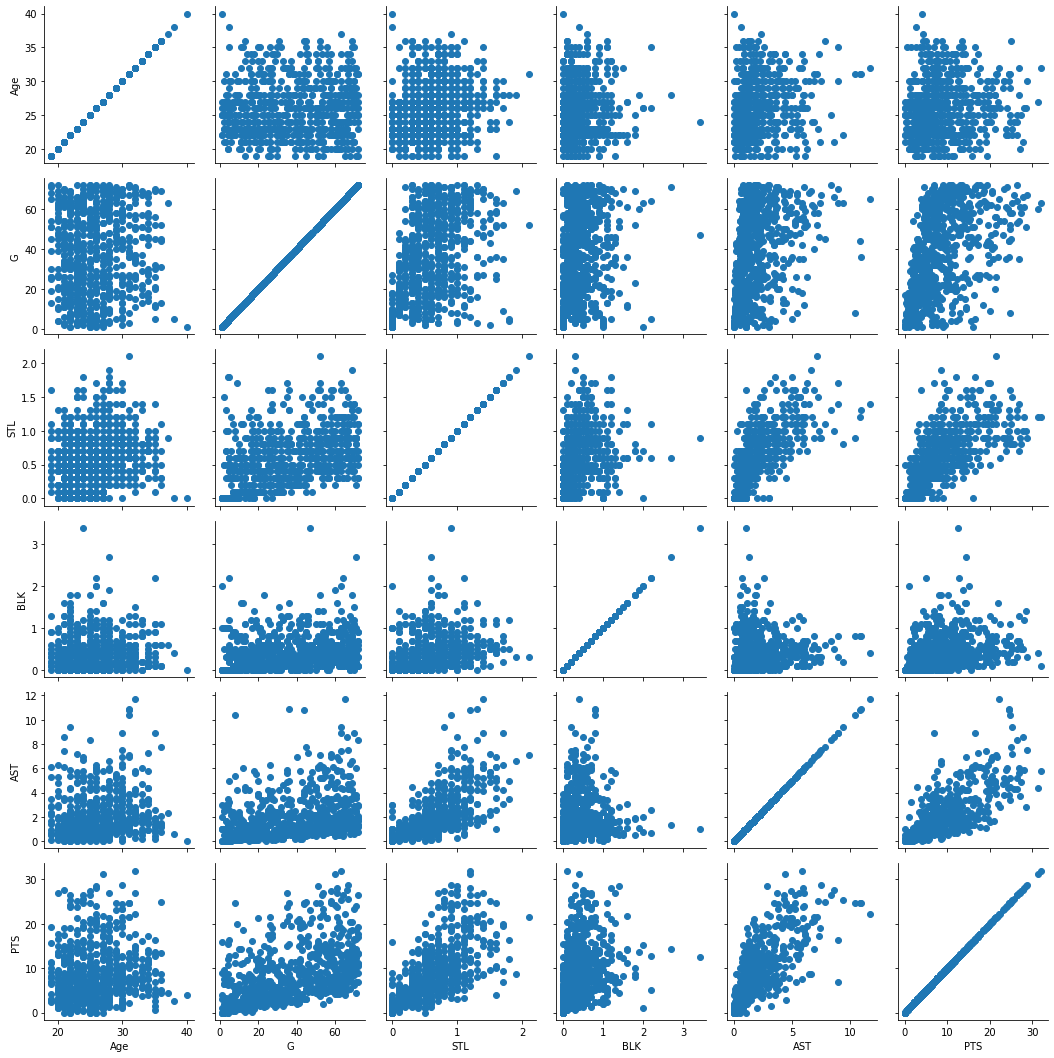

In [50]:
import seaborn as sns

g = sns.PairGrid(df5)
g.map(plt.scatter);

Tüm sütunları birlikte görüntülemek analiz yapmayı zorlaştıracaktır. Ancak yine de görüntülemekte fayda vardır. 

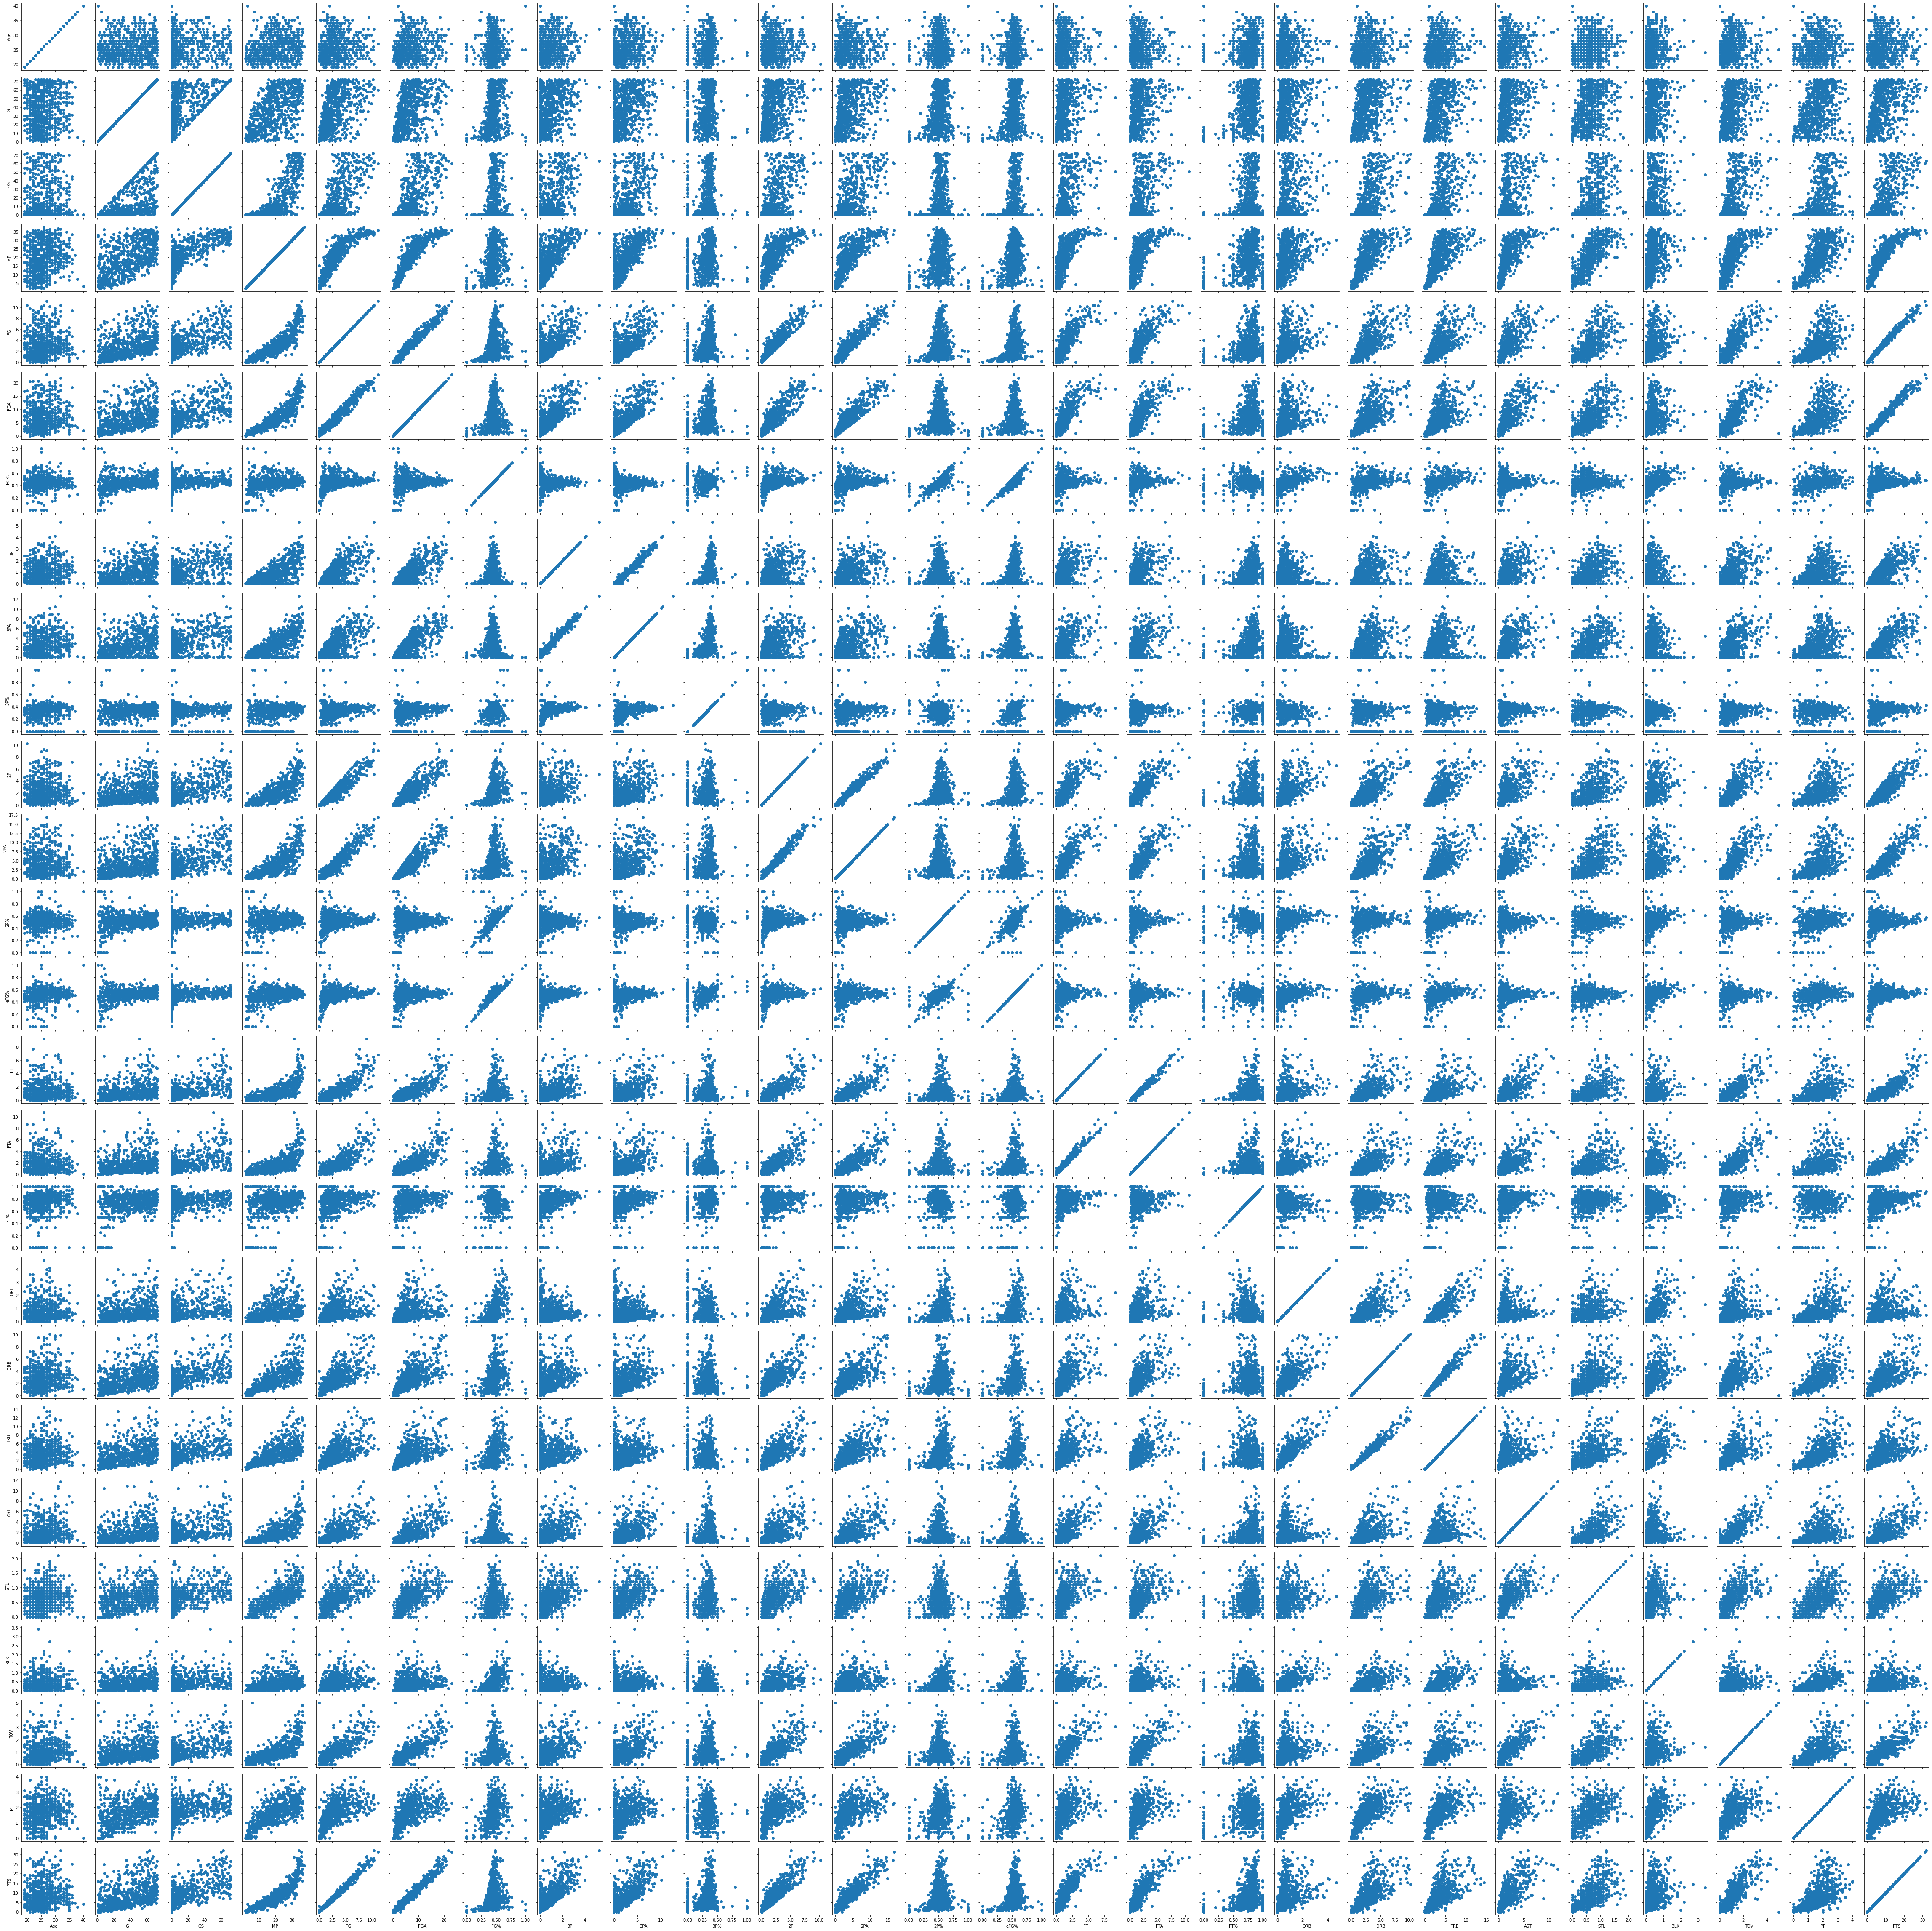

In [51]:
import seaborn as sns

g = sns.PairGrid(number)
g.map(plt.scatter)